<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Classification%20Problems/Classification_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Import Data for classification

In [2]:
from sklearn.datasets import  make_circles

## Preparing the data

In [3]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

X.shape, y.shape

((1000, 2), (1000,))

In [4]:
# check the features and labels
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

## Plot the data

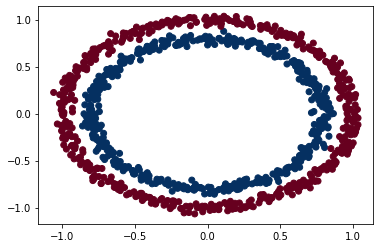

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu);

lets build a model to classify red and blue circles

# Create an Utility function for ploting the decision boundary

In [6]:
def plot_decision_boundary(model,X,y):
  # creating boundary for plotting
  x_min, x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1
  # creating a grid
  XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  
  # input to the model
  x_in = np.c_[XX.ravel(), YY.ravel()]
  print('shape of input',x_in.shape)
  # predicting and reshaping
  y_preds = model.predict(x_in)
  print('shape of prediction',y_preds.shape)
  if len(y_preds[0])>1:
    print('Multiclass classification')
    y_preds = np.argmax(y_preds, axis=1).reshape(XX.shape)
  else:
    print('Binary classification')
    y_preds = np.round(y_preds).reshape(XX.shape)
  
  # plotting
  plt.contourf(XX, YY, y_preds, cmap=plt.cm.RdBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.RdBu)
  plt.xlim(XX.min(), XX.max())
  plt.ylim(YY.min(), YY.max())
  plt.show()

# Creating a simple tensorflow classification model

In [7]:
# set the seed
tf.random.set_seed(42)
# create a model with one hiddenlayer unit 
clf_0 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# compile the model
# since this is a binary classification problem we use binary-cross-entropy as loss function
# optimizer = stochastic optimizer
clf_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.SGD(),
              metrics = ['accuracy'])

# train the model
history = clf_0.fit(X,y, epochs=10, verbose=0)


## plot the loss curve

In [8]:
loss_df_0 = pd.DataFrame(history.history)
loss_df_0.head(5)

,loss,accuracy
0,2.854409,0.460
1,0.713060,0.543
2,0.697326,0.509
3,0.695041,0.501
4,0.694191,0.482


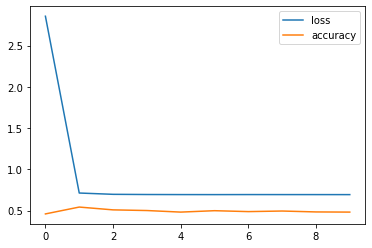

In [9]:
loss_df_0.plot();

## plot the decision boundary

shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


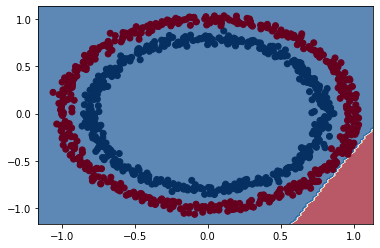

In [10]:
# plotting th model
plot_decision_boundary(clf_0, X, y)


## improve the simple model -- experiment 1
* add more layers
* add mode hidden units
* try different optimizer
* try differnt loss-function
* train for longer

In [11]:
# set the seed
tf.random.set_seed(42)
# creating a model with two hidden layers having hidden units 10 ,5 and 1 output layer
clf_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1)
])
# compile the model
# use adam optimizer
# use binary cross-entropy as loss function
clf_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# train the model
history_1 = clf_1.fit(X,y, epochs=100, verbose=0)


#### plot the loss curve

In [12]:
loss_df_1 = pd.DataFrame(history_1.history)
loss_df_1.head(5)

,loss,accuracy
0,3.969878,0.429
1,3.327711,0.423
2,1.586153,0.440
3,0.791848,0.500
4,0.748657,0.500


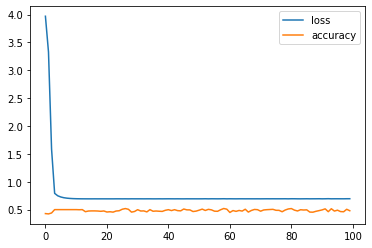

In [13]:
# plot the loss curve
loss_df_1.plot();

#### plot the decision boundary

shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


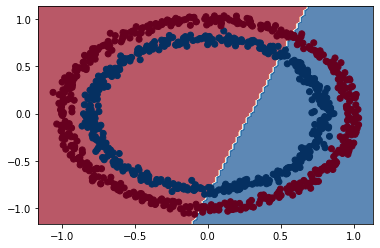

In [14]:
# plot the decision boundary
plot_decision_boundary(clf_1,X,y)

## imporve the simple model -- experiment 2
* add more layers - a hidden-layer and an ouptput-layer
* add hidden-layer activation = `ReLU`
* add `Adam` optimizer
* add BinaryCrossentropy as loss-function 
* train longer , 100 epochs


In [15]:
# set the seed
tf.random.set_seed(42)

# create a model with a hidden-layers having hidden-units = 5 and 1 output layer
# add hidden-layer activation

clf_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(5,activation='relu'),
                             tf.keras.layers.Dense(1) # output layer
])
# compile the model
clf_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# train the model
history_2 = clf_2.fit(X,y,epochs=100,verbose=0)

### plot the loss curve

In [16]:
loss_df_2 = pd.DataFrame(history_2.history)
loss_df_2.head(5)

,loss,accuracy
0,2.113871,0.460
1,1.670246,0.451
2,1.163601,0.427
3,0.891503,0.389
4,0.858033,0.349


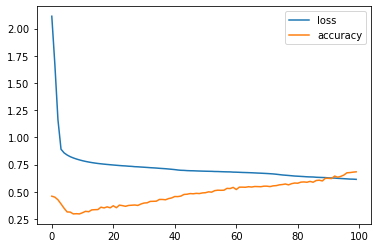

In [17]:
loss_df_2.plot();

### plot the decision bounday

shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


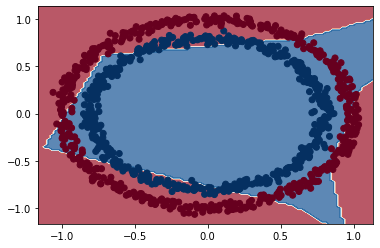

In [18]:
plot_decision_boundary(clf_2, X, y)

## improve the simple model -- experiment3
* add more layers - a hidden-layer and an ouptput-layer
* add hidden-layer activation = `ReLU`
* add output-layer activation = `Sigmoid`
* add `Adam` optimizer
* add BinaryCrossentropy as loss-function 
* train longer , 100 epochs

In [19]:
# set the seed 
tf.random.set_seed(42)

# create a model with a hidden layers having 5 hidden-units and a ouptlayer
# set hidden layer activation to ReLU
# set output layer activation to Sigmoid
clf_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
clf_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# train the model
history_3 = clf_3.fit(X, y, epochs=100, verbose=0)

### plot the loss curve

In [20]:
loss_df_3 = pd.DataFrame(history_3.history)
loss_df_3.head(5)

,loss,accuracy
0,0.725799,0.504
1,0.718821,0.498
2,0.713652,0.499
3,0.709860,0.482
4,0.707185,0.462


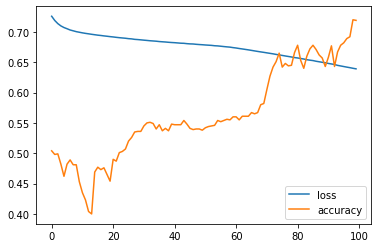

In [21]:
loss_df_3.plot();

### plot the decision boundary

shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


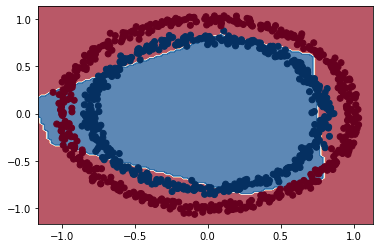

In [22]:
plot_decision_boundary(clf_3, X, y)

## imporve the simple model -- experiment4
* add more layers - two hidden-layer and an ouptput-layer
* add hidden-layer activation = `ReLU`
* add output-layer activation = `Sigmoid`
* add `Adam` optimizer
* add BinaryCrossentropy as loss-function 
* train longer , 100 epochs

In [23]:
# set the seed 
tf.random.set_seed(42)

# create a model with two hidden layers having 10,5 hidden-units and a ouptlayer
# set hidden layer activation to ReLU
# set output layer activation to Sigmoid
clf_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
clf_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# train the model
history_4 = clf_4.fit(X, y, epochs=100, verbose=0)

### plot the loss curve

In [24]:
loss_df_4 = pd.DataFrame(history_4.history)
loss_df_4.tail(5)

,loss,accuracy
95,0.057150,1.000
96,0.055513,1.000
97,0.054391,1.000
98,0.053360,0.999
99,0.051110,1.000


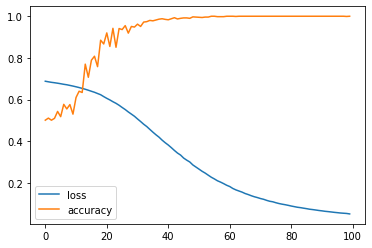

In [25]:
# plot the loss curve
loss_df_4.plot();

### plot the decision boundary

shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


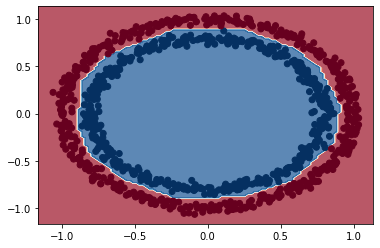

In [26]:
plot_decision_boundary(clf_4,X,y)

# Complete example
* Import the data 
* Split the data into Train and Test sets
* Create a tesorflow fully connected Neural Network Model
* Train the Model on the training set
* Test the performance of the model on test set

In [32]:
from sklearn.datasets import  make_circles
from sklearn.model_selection import  train_test_split

# import the data
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a Neural network (fully connected)

# set hidden layer acitvation to Relu
# set output layer activation to sigmoid
final_clf = tf.keras.Sequential([
                                 tf.keras.layers.Dense(5, activation='relu'), # hidden-layer with 5 hidden-units
                                 tf.keras.layers.Dense(1, activation='sigmoid') # output layer 
])

# compile the model

# since the problem is binary classification use binary-cross-entropy as loss function
# use adam optimizer and accuracy as evaluation metrics
final_clf.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

# train the model on the test split
final_history = final_clf.fit(X_train, y_train, epochs=30, verbose=0)


## plot the loss-curve

In [34]:
loss_df_final = pd.DataFrame(final_history.history)
loss_df_final.tail(5)

,loss,accuracy
25,0.416043,0.95875
26,0.401232,0.97625
27,0.387734,0.96500
28,0.370613,0.98375
29,0.356578,0.98125


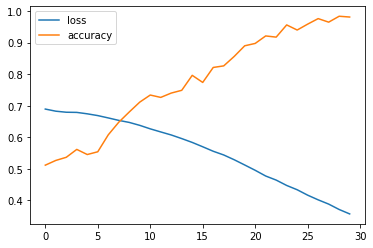

In [36]:
# plot the loss curve
loss_df_final.plot();

## evaluate the model on test split

In [37]:
final_clf.evaluate(X_test, y_test) 

7/7 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.9650


[0.3902105689048767, 0.9649999737739563]

## plot the decision boundary

Model performance on Training set
shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


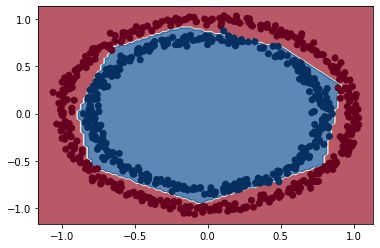

Model performance on Test set
shape of input (10000, 2)
shape of prediction (10000, 1)
Binary classification


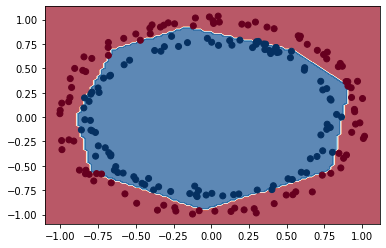

In [42]:
print('Model performance on Training set')
plot_decision_boundary(final_clf,X_train, y_train)


print('Model performance on Test set')
plot_decision_boundary(final_clf, X_test, y_test)